In [1]:
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

# Data Processing

In [2]:
messages=pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
messages.head(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN


In [4]:
messages.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1, inplace=True)


In [5]:
messages.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
messages=messages.rename(columns={'v1':'class','v2':'text'})
messages.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
messages.groupby('class').describe()

text                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [8]:
messages['length']=messages['text'].apply(len)
messages.head()

,class,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000187ECBBDF98>,
      dtype=object)

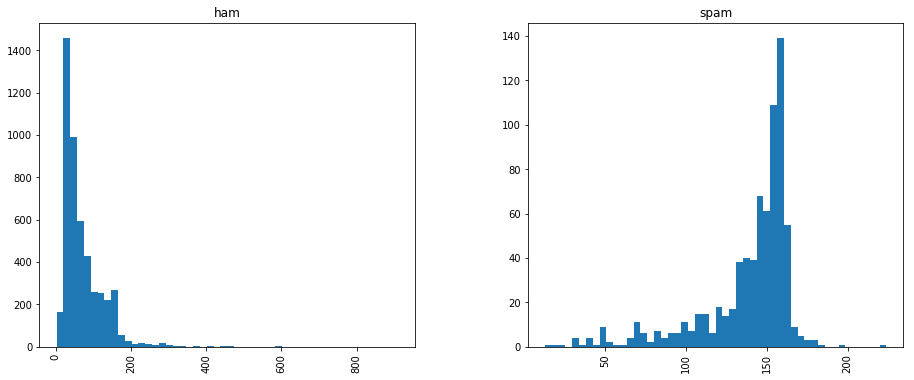

In [9]:
messages.hist(column='length',by='class',bins=50,figsize=(15,6))

length on x axis
length of ham emails is always around 200 words whereas spam emails are of shorter length around 150 words


# Create Tokenizer

In [10]:
def process_Text(text):
    nopunc=[char for char in text if char not in string.punctuation]
    nopunc=''.join(nopunc)
    clean_words=[word for word in nopunc.split() if word.lower() 
                 not in stopwords.words('english')]
    return clean_words

In [11]:
import nltk
nltk.download('stopwords')
  
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dilip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
process_Text(messages['text'])

['Go',
 'jurong',
 'point,',
 'crazy..',
 'Available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'Cine',
 'got',
 'amore',
 'wat...Ok',
 'lar...',
 'Joking',
 'wif',
 'u',
 'oni...Free',
 'entry',
 '2',
 'wkly',
 'comp',
 'win',
 'FA',
 'Cup',
 'final',
 'tkts',
 '21st',
 'May',
 '2005.',
 'Text',
 'FA',
 '87121',
 'receive',
 'entry',
 'question(std',
 'txt',
 "rate)T&C's",
 'apply',
 "08452810075over18'sU",
 'dun',
 'say',
 'early',
 'hor...',
 'U',
 'c',
 'already',
 'say...Nah',
 'think',
 'goes',
 'usf,',
 'lives',
 'around',
 'thoughFreeMsg',
 'Hey',
 'darling',
 '3',
 "week's",
 'word',
 'back!',
 "I'd",
 'like',
 'fun',
 'still?',
 'Tb',
 'ok!',
 'XxX',
 'std',
 'chgs',
 'send,',
 'å£1.50',
 'rcvEven',
 'brother',
 'like',
 'speak',
 'me.',
 'treat',
 'like',
 'aids',
 'patent.As',
 'per',
 'request',
 "'Melle",
 'Melle',
 '(Oru',
 'Minnaminunginte',
 'Nurungu',
 "Vettam)'",
 'set',
 'callertune',
 'Callers.',
 'Press',
 '*9',
 'copy',
 'friends',
 'Caller

In [13]:
messages['text'].apply(process_Text).head()

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: text, dtype: object

In [14]:
msg_train,msg_test,class_train,class_Test=train_test_split(messages['text'],messages['class'],test_size=0.2)

In [15]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=process_Text)), # converts strings to integer counts
    ('tfidf',TfidfTransformer()), # converts integer counts to weighted TF-IDF scores
    ('classifier',MultinomialNB()) # train on TF-IDF vectors with Naive Bayes classifier
])

In [16]:
pipeline.fit(msg_train,class_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function process_Text at 0x00000187EC9F79D8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [17]:
predict=pipeline.predict(msg_test)
predict

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [18]:
print(classification_report(class_Test,predict))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       975
        spam       1.00      0.74      0.85       140

   micro avg       0.97      0.97      0.97      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.97      0.96      1115



In [19]:
type(msg_test)

pandas.core.series.Series

In [20]:
myemailtest=pd.Series(["Elections Special: It's your chance to become a leader on your campus!","22 days left for the world's largest democratic elections to begin. Political leaders all over India are out and about delivering speeches to convince people to vote for them. Who do you think is going to win the elections this time?Well, that is something we can't say but one thing is for sure, political leaders with great communication and leadership skills will definitely have an advantage!And, such skills come handy not only in elections but also in getting your dream job. So, to help you hone these skills we have handpicked some of the best campus ambassador programs for you. Apply to the below programs now!  All India Council For Robotics And Automation - Position Open: 1000 WERP-India - Positions Open: "])



In [21]:
pipeline.predict(myemailtest)

array(['ham', 'ham'], dtype='<U4')